In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#import findspark
#findspark.init()
#import pyspark
#import random
#sc = pyspark.SparkContext()

df_clicks= pd.read_csv('clicks.csv.gzip',compression='gzip'); 
df_events= pd.read_csv('events.csv.gzip',low_memory=False,compression='gzip'); 
df_installs= pd.read_csv('installs.csv.gzip',compression='gzip'); 
df_auctions= pd.read_csv('auctions.csv.gzip',compression='gzip'); 

In [43]:
df_installs.application_id.value_counts().

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

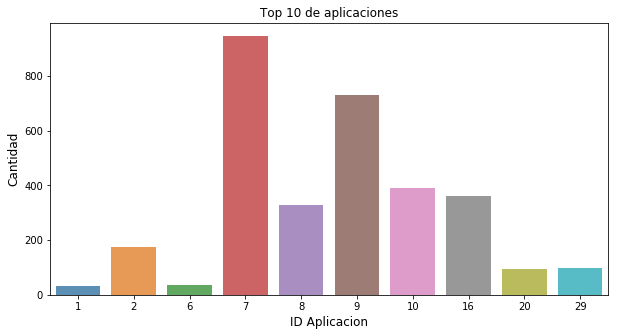

In [47]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
app_count  = df_installs['application_id'].value_counts(, sort=True,)
app_count = app_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(app_count.index, app_count.values, alpha=0.8)
plt.title('Top 10 de aplicaciones')
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('ID Aplicacion', fontsize=12)
plt.show()

In [5]:
df_events.date = pd.to_datetime(df_events.date)

In [11]:
df_eventos_por_dia = df_events.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')

In [28]:
df_eventos_por_dia

,dia,cantidad
0,2019-03-13,316267
1,2019-03-12,296665
2,2019-03-10,293091
3,2019-03-09,286221
4,2019-03-08,285535
5,2019-03-11,268884
6,2019-03-07,253706
7,2019-03-06,253505
8,2019-03-05,240549


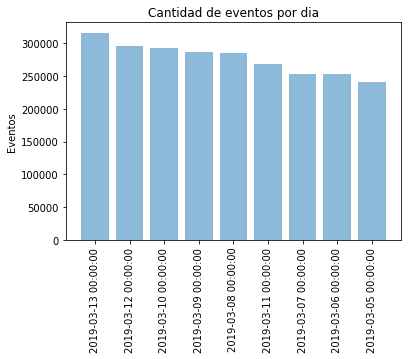

In [33]:
plt.bar(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.cantidad, align='center', alpha=0.5)
plt.xticks(np.arange(len(df_eventos_por_dia)), df_eventos_por_dia.dia,rotation=90)
plt.ylabel('Eventos')
plt.title('Cantidad de eventos por dia')
 
plt.show()

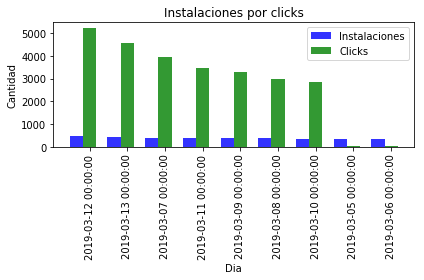

In [38]:
n_groups = 9
eventos = df_eventos_por_dia.cantidad
clicks = df_clicks_por_dia.cantidad
instalaciones = df_installs_por_dia.cantidad
subastas = df_auctions_por_dia.cantidad
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, instalaciones, bar_width,
alpha=opacity,
color='b',
label='Instalaciones')
 
rects2 = plt.bar(index + bar_width, clicks, bar_width,
alpha=opacity,
color='g',
label='Clicks')
 
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.title('Instalaciones por clicks')
plt.xticks(index + bar_width, df_installs_por_dia.dia,rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()

In [15]:
df_clicks.created = pd.to_datetime(df_clicks.created)

In [16]:
df_clicks_por_dia = df_clicks.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')

In [17]:
df_clicks_por_dia

,dia,cantidad
0,2019-03-12,5204
1,2019-03-11,4557
2,2019-03-10,3966
3,2019-03-13,3468
4,2019-03-09,3283
5,2019-03-07,2989
6,2019-03-08,2839
7,2019-03-05,31
8,2019-03-06,14


In [19]:
df_installs.created = pd.to_datetime(df_installs.created)

In [20]:
df_installs_por_dia = df_installs.created\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')

In [22]:
df_installs_por_dia

,dia,cantidad
0,2019-03-12,472
1,2019-03-13,423
2,2019-03-07,393
3,2019-03-11,377
4,2019-03-09,368
5,2019-03-08,366
6,2019-03-10,351
7,2019-03-05,337
8,2019-03-06,325


In [24]:
df_auctions.date = pd.to_datetime(df_auctions.date)

In [25]:
df_auctions_por_dia = df_auctions.date\
       .dt.floor('d')\
       .value_counts()\
       .rename_axis('dia')\
       .reset_index(name='cantidad')

In [26]:
df_auctions_por_dia

,dia,cantidad
0,2019-03-13,2938373
1,2019-03-12,2779910
2,2019-03-10,2637534
3,2019-03-11,2574916
4,2019-03-08,2303002
5,2019-03-09,2074552
6,2019-03-07,2047661
7,2019-03-05,1182401
8,2019-03-06,1032970


In [9]:
#Eventos que son instalaciones 42474 (1,7%)

df_events["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    2451949
True       42474
Name: ref_hash, dtype: int64

In [11]:
#Eventos que son subastas 1047126 (41,9%)

df_events["ref_hash"].isin(df_auctions["device_id"]).value_counts()

False    1447297
True     1047126
Name: ref_hash, dtype: int64

In [15]:
#Subastas que terminan en clicks 5302392 (27,1%)

df_auctions["device_id"].isin(df_clicks["ref_hash"]).value_counts()

False    14268927
True      5302392
Name: device_id, dtype: int64

In [16]:
#Subastas que terminan en instalaciones 59416 (0,3%)

df_auctions["device_id"].isin(df_installs["ref_hash"]).value_counts()

False    19511903
True        59416
Name: device_id, dtype: int64

In [18]:
#Clicks que terminan en instalaciones 11 (0,04%)

df_clicks["ref_hash"].isin(df_installs["ref_hash"]).value_counts()

False    26340
True        11
Name: ref_hash, dtype: int64

In [19]:
#errores humanos o de la app. Los tenemos en cuenta?
df_clicks= pd.read_csv('clicks.csv');
df_clicks.timeToClick = df_clicks.timeToClick.replace(np.NaN,0)

df_clicks.timeToClick = df_clicks.timeToClick.astype('timedelta64[s]')
x = df_clicks['timeToClick'] == '00:00:00'
x.value_counts()


False    21043
True      5308
Name: timeToClick, dtype: int64